In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
data = load_iris()
inp, y = data['data'], data['target']
X = inp[y<2]
y = y[y<2]
y[y==0] = -1
print('Shape of input: {}'.format(X.shape))

Shape of input: (100, 4)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)
print(X_train.shape, X_test.shape)

(80, 4) (20, 4)


In [4]:
import optim
import model

In [5]:
def predict(model, X, y, threshold=0):
    y_pred = model.predict(X)
    zeros = y_pred[y == -1]
    ones = y_pred[y == 1]
    y_pred[y_pred>threshold] = 1
    y_pred[y_pred<=threshold] = -1
    
    return y_pred, 1/(1+np.exp(-zeros)), 1/(1+np.exp(-ones))
    
def visualize_result(model, X, y):
    y_pred, zeros, ones = predict(model, X, y)
    print('Accuracy score: {}'.format(np.round(accuracy_score(y_pred, y), 3)))

    plt.figure(figsize=(10, 5))
    plt.plot(zeros, 'o', label='Negative')
    plt.plot(ones, 'o', label='Positive')
    plt.title('Distribution of outputs by classes')
    plt.xlabel('Number of example')
    plt.ylabel('Model output')
    plt.legend()
    plt.grid()
    plt.show()

**Classic Gradient**

In [ ]:
clf = model.LogisticRegressor(input_size=X_train.shape[1], bias=True)
classic = optim.GradientDescent(clf.W, lr=0.1, weight_decay=0.1)
print(clf)
start = time.time()
clf.fit(X=X_train, y=y_train, optimizer=classic, epoch=3, verbose=0, normalized=True)
print('Time spent: {}'.format(time.time()-start))
visualize_result(clf, X_test, y_test)

**SGD**

Logistic Regressor
	Number of input: 4
	Bias:		 True

Computing loss:	activation:-0.7807571429274698	loss:0.37710614291468686
Computing gradient:	first_term:[-5.5 -4.2 -1.4 -0.2 -1. ]	second_term:0.314156727371556	gradient:[[1.727862   1.31945825 0.43981942 0.06283135 0.31415673]]
New weights are: [[-3.75307074 -2.968735   -1.16504291  0.79278819 -1.86629226]]

Computing loss:	activation:-31.371091840819748	loss:2.375877272697807e-14
Computing gradient:	first_term:[-5.  -3.2 -1.2 -0.2 -1. ]	second_term:1e-10	gradient:[[5.0e-10 3.2e-10 1.2e-10 2.0e-11 1.0e-10]]
New weights are: [[-7.8236308  -5.57389344 -2.14197732  0.62996579 -2.68040427]]

Computing loss:	activation:-73.7604075442092	loss:73.7604075442092
Computing gradient:	first_term:[6.1 2.8 4.  1.3 1. ]	second_term:1.0	gradient:[[-6.1 -2.8 -4.  -1.3 -1. ]]
New weights are: [[-4.00336298 -3.82032788  0.36311633  1.44412123 -2.05413086]]

Computing loss:	activation:-29.950691748489707	loss:9.836575998178404e-14
Computing gradient:	f

C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


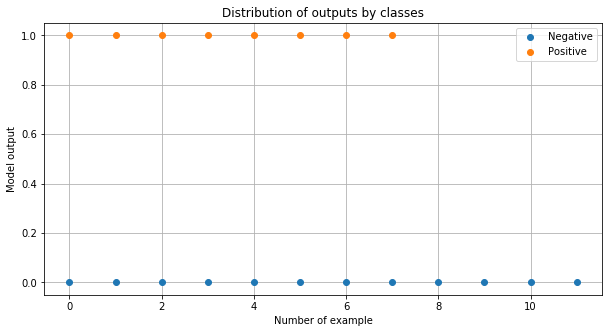

In [14]:
clf = model.LogisticRegressor(input_size=X_train.shape[1], bias=True)
sgd = optim.SGD(clf.W, lr=5, weight_decay=0, verbose=True)
print(clf)
start = time.time()
clf.fit(X=X_train, y=y_train, optimizer=sgd, epoch=1, verbose=1)
print('Time spent: {}'.format(time.time()-start))
visualize_result(clf, X_test, y_test)